# Детектирование объектов

### Задача 
Обучить детектор объектов с помощью TensorFlow Object Detection API
<br>
Библиотеки: [Python, Tensorflow 1]

### Решение

### Подготавливаем рабочее пространство

На основе руководства по установке TF2 Object Detection API https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html#try-out-the-examples

In [1]:
%%bash
mkdir TensorFlow; cd TensorFlow
git clone https://github.com/tensorflow/models

Cloning into 'models'...


In [2]:
!uname -a

Linux 7714e3e7f3f0 4.19.112+ #1 SMP Thu Jul 23 08:00:38 PDT 2020 x86_64 x86_64 x86_64 GNU/Linux


In [3]:
%%capture
!wget https://github.com/protocolbuffers/protobuf/releases/download/v3.13.0/protoc-3.13.0-linux-x86_64.zip

In [4]:
%%bash
unzip -q protoc-3.13.0-linux-x86_64.zip -d ./protoc
rm -r protoc-3.13.0-linux-x86_64.zip

In [5]:
!export PATH=/content/protoc${PATH:+:${PATH}}

In [6]:
!cd /content/TensorFlow/models/research; protoc object_detection/protos/*.proto --python_out=.

In [7]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 11.75 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [8]:
!cd ./cocoapi/PythonAPI; make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I../common -I/usr/include/python3.6m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.6/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:

In [9]:
!cp -r ./cocoapi/PythonAPI/pycocotools ./TensorFlow/models/research/

In [10]:
%%bash
cd TensorFlow/models/research
cp ./object_detection/packages/tf2/setup.py .

Установка пакета object detection из TF Object Detection API 2

In [11]:
%%bash
cd TensorFlow/models/research
pip install .

Processing /content/TensorFlow/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1550866 sha256=c56b64ca9e54c0d924208535d53c6818a00d097b0def6239c91c95ea09c1763b
  Stored in directory: /tmp/pip-ephem-wheel-cache-9nd13qbj/wheels/1e/a6/ce/339480921228eb089bee0cdaf7efbaa7b5cf803ec6420ab905
  Created wheel for avro-python3: filename=avro_python3-1.10.0-cp36-none-any.whl size=43735 sha256=daf638790ca282aec7a3bff3a95fc4d5fd7e79a02efd3300b433fc80b64a00dd
  Stored in directory: /root/.cache/pip/wheels/3f/15/cd/fe4ec8b88c130393464703ee8111e2cddebdc40e1b59ea85e9
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=fdbdba62718a84e09d8413d0bd14a756fcfa9d104b21c88030e0b40b566b7fd0
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
  Created wheel for oauth2client: filename=oauth2client-3.0.0-cp36-none-any.whl size=106382 sha256=b52c220498771566ef181c1c22

ERROR: pydrive 1.3.1 has requirement oauth2client>=4.0.0, but you'll have oauth2client 3.0.0 which is incompatible.
ERROR: multiprocess 0.70.10 has requirement dill>=0.3.2, but you'll have dill 0.3.1.1 which is incompatible.
ERROR: apache-beam 2.23.0 has requirement avro-python3!=1.9.2,<1.10.0,>=1.8.1; python_version >= "3.0", but you'll have avro-python3 1.10.0 which is incompatible.


Проверка установки

In [12]:
!python TensorFlow/models/research/object_detection/builders/model_builder_tf2_test.py

2020-08-24 16:15:35.202331: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model
2020-08-24 16:15:37.421009: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-08-24 16:15:37.476782: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-24 16:15:37.477373: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-08-24 16:15:37.477411: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] 

Ура! Всё готово!

### Теперь попробуем запустить модель для детектирования объектов

Скачиваем модель

In [33]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_hg104_1024x1024_coco17_tpu-32.tar.gz
!tar -zxvf centernet_hg104_1024x1024_coco17_tpu-32.tar.gz

PATH_TO_MODEL_DIR = "centernet_hg104_1024x1024_coco17_tpu-32"

centernet_hg104_1024x1024_coco17_tpu-32/
centernet_hg104_1024x1024_coco17_tpu-32/checkpoint/
centernet_hg104_1024x1024_coco17_tpu-32/checkpoint/ckpt-0.data-00000-of-00001
centernet_hg104_1024x1024_coco17_tpu-32/checkpoint/checkpoint
centernet_hg104_1024x1024_coco17_tpu-32/checkpoint/ckpt-0.index
centernet_hg104_1024x1024_coco17_tpu-32/pipeline.config
centernet_hg104_1024x1024_coco17_tpu-32/saved_model/
centernet_hg104_1024x1024_coco17_tpu-32/saved_model/saved_model.pb
centernet_hg104_1024x1024_coco17_tpu-32/saved_model/variables/
centernet_hg104_1024x1024_coco17_tpu-32/saved_model/variables/variables.data-00000-of-00001
centernet_hg104_1024x1024_coco17_tpu-32/saved_model/variables/variables.index


In [35]:
!wget https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/data/mscoco_label_map.pbtxt

--2020-08-24 16:36:28--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/data/mscoco_label_map.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5056 (4.9K) [text/plain]
Saving to: ‘mscoco_label_map.pbtxt’

mscoco_label_map.pb 100%[===================>]   4.94K  --.-KB/s    in 0s      

2020-08-24 16:36:29 (71.8 MB/s) - ‘mscoco_label_map.pbtxt’ saved [5056/5056]



Загружаем скаченную модель

In [36]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

model = tf.saved_model.load(os.path.join(PATH_TO_MODEL_DIR, 'saved_model'))

Формируем список классов

In [37]:
category_index = label_map_util.create_category_index_from_labelmap('mscoco_label_map.pbtxt', use_display_name=True)

Запускаем предсказание

In [43]:
!wget -O test_image.jpg https://bikeportland.org/wp-content/uploads/2020/04/Screen-Shot-2020-04-23-at-1.16.32-PM.jpg

--2020-08-24 16:48:34--  https://bikeportland.org/wp-content/uploads/2020/04/Screen-Shot-2020-04-23-at-1.16.32-PM.jpg
Resolving bikeportland.org (bikeportland.org)... 104.26.3.16, 172.67.75.40, 104.26.2.16, ...
Connecting to bikeportland.org (bikeportland.org)|104.26.3.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 693626 (677K) [image/jpeg]
Saving to: ‘test_image.jpg’

test_image.jpg      100%[===================>] 677.37K  --.-KB/s    in 0.02s   

2020-08-24 16:48:34 (29.2 MB/s) - ‘test_image.jpg’ saved [693626/693626]



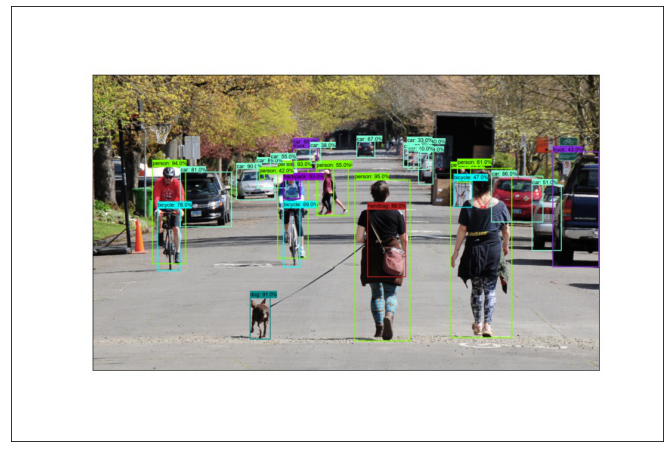

In [4]:
import numpy as np
from PIL import Image, ImageFont
import matplotlib.pyplot as plt


image_np = np.array(Image.open('test_image.jpg'))

input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis, ...]

detections = model(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
                for key, value in detections.items()}

detections['num_detections'] = num_detections
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.3,
      agnostic_mode=False)

plt.figure(figsize=(12, 8))
plt.imshow(image_np_with_detections)
plt.xticks([]), plt.yticks([])
plt.show()